In [1]:
%load_ext google.cloud.bigquery

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 14 years ago. So if today is 2023.10.27 then the weather we want to forecast is for the date 2009.10.28. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part

In [2]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Downloading: 100%|██████████| 20/20 [00:06<00:00,  2.95rows/s]


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,30050,99999,1929,12,28,40.000000,4,35.000000,4.0,990.500000,...,NaN,None,0.00,NaN,False,False,False,False,False,False
1,30910,99999,1929,10,27,39.000000,4,NaN,NaN,NaN,...,NaN,None,0.08,NaN,False,False,False,False,False,False
2,31590,99999,1929,11,14,36.000000,4,33.500000,4.0,999.299988,...,NaN,None,0.00,NaN,False,False,False,False,False,False
3,38640,99999,1929,10,11,58.500000,4,53.299999,4.0,1025.599976,...,NaN,None,NaN,NaN,False,False,False,False,False,False
4,37950,99999,1929,10,12,53.500000,4,49.000000,4.0,1028.000000,...,NaN,None,0.00,NaN,False,False,False,False,False,False
5,38640,99999,1929,12,9,49.000000,4,40.500000,4.0,998.900024,...,NaN,None,NaN,NaN,False,False,False,False,False,False
6,34970,99999,1929,8,16,61.000000,4,54.700001,4.0,1015.000000,...,NaN,None,0.00,NaN,False,False,False,False,False,False
7,37950,99999,1929,11,17,39.000000,4,34.700001,4.0,1005.099976,...,NaN,None,0.00,NaN,False,False,False,False,False,False
8,37950,99999,1929,8,6,57.000000,4,55.299999,4.0,1010.299988,...,NaN,None,NaN,NaN,False,False,False,False,False,False
9,39800,99999,1929,11,1,51.000000,4,49.799999,4.0,1023.799988,...,NaN,None,NaN,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [3]:
%%bigquery  df
SELECT 
#format the date to get "YYYY-MM-DD"
CAST(CAST((year*10000+month*100+day) AS string) AS date FORMAT "YYYYMMDD") as observed_date,
#since we have used the variables "year, "month" and "day", we need to filter them away
* EXCEPT(year, month, day)
FROM `bigquery-public-data.samples.gsod`
#filter according to conditions
WHERE 
year BETWEEN 2005 AND 2009
AND
station_number BETWEEN 725300 AND 726300 


Downloading: 100%|██████████| 377784/377784 [00:09<00:00, 41860.05rows/s] 


### Alternative
Another option to get the formatted date is the following: "FORMAT_DATETIME("%Y-%m-%d" , DATETIME(year, month, day,0,0,0)) as observed_date".
The advantage of this approach is that it has only one transformation.
The disadvantage is that the output of this function is going to be a STRING. Since we are dealing with dates, it is better to keep the output as a date

### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

In [4]:
#we want to filter all stations larger then 725330 
df = df.loc[df["station_number"]<=725330]
df["station_number"].unique()

array([725314, 725317, 725327, 725326, 725305, 725315, 725316, 725300,
       725320, 725330])

I assume that we want to filter the stations that have information in the time range from 2005 and 2009
Thus, we want to filter out the stations that have min(observed_date)>2005 and max(observed_date)<2009b

In [5]:
df["approved timerange"] = False
df.groupby(by = "station_number").apply(lambda x: 
                                    False  if (min(x["observed_date"]).year>2005 or 
                                    max(x["observed_date"]).year<2009)
                                    else True)

station_number
725300    True
725305    True
725314    True
725315    True
725316    True
725317    True
725320    True
725326    True
725327    True
725330    True
dtype: bool

In [6]:
#we see that each station has similar number of observations
df.groupby(by = "station_number")["station_number"].count()

station_number
725300    1822
725305    1824
725314    1800
725315    1824
725316    1824
725317    1822
725320    1824
725326    1785
725327    1781
725330    1823
Name: station_number, dtype: int64

In [7]:
df["year"] = df["observed_date"].apply(lambda x: x.year)
for station in df["station_number"].unique():
    print("station number is ", station)
    print(df[df["station_number"] == station].groupby(by = "year")["year"].count())
df = df.drop("year", axis =1);

station number is  725314
year
2005    350
2006    357
2007    364
2008    364
2009    365
Name: year, dtype: int64
station number is  725317
year
2005    364
2006    365
2007    364
2008    364
2009    365
Name: year, dtype: int64
station number is  725327
year
2005    358
2006    333
2007    364
2008    363
2009    363
Name: year, dtype: int64
station number is  725326
year
2005    365
2006    359
2007    364
2008    361
2009    336
Name: year, dtype: int64
station number is  725305
year
2005    365
2006    365
2007    364
2008    365
2009    365
Name: year, dtype: int64
station number is  725315
year
2005    365
2006    365
2007    364
2008    365
2009    365
Name: year, dtype: int64
station number is  725316
year
2005    365
2006    365
2007    364
2008    365
2009    365
Name: year, dtype: int64
station number is  725300
year
2005    365
2006    365
2007    363
2008    364
2009    365
Name: year, dtype: int64
station number is  725320
year
2005    365
2006    365
2007    364
2008 

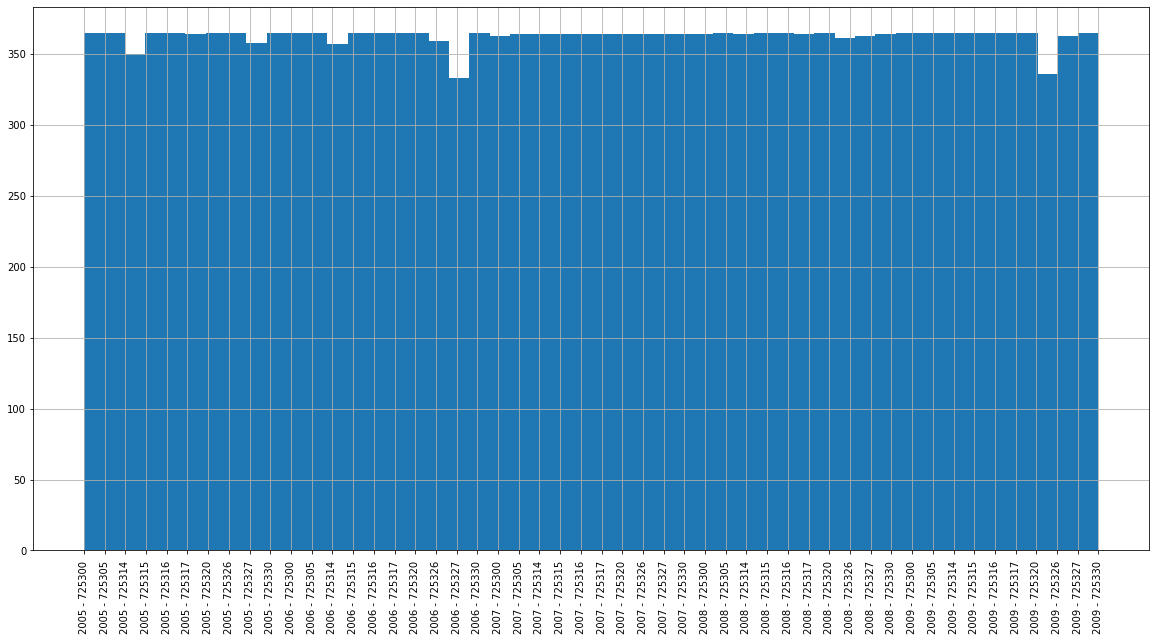

In [8]:
#Let's visualize the distribution of the years
check_dist = df.groupby(by = ["observed_date","station_number"]).apply(lambda x: 
                                                          f"{min(x['observed_date']).year} - {x['station_number'].min()} ")
check_dist.hist(bins = len(check_dist.unique()),figsize = (20,10), xrot =90);

We see that all stations have data from 2005 till 2009.

Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

In [9]:
#Let's first depict the general information about DataFrame
#We notice that there are some objects. We assume to have nans there. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18129 entries, 60 to 377762
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   observed_date                       18129 non-null  object 
 1   station_number                      18129 non-null  int64  
 2   wban_number                         18129 non-null  int64  
 3   mean_temp                           18129 non-null  float64
 4   num_mean_temp_samples               18129 non-null  int64  
 5   mean_dew_point                      18127 non-null  float64
 6   num_mean_dew_point_samples          18127 non-null  float64
 7   mean_sealevel_pressure              16291 non-null  float64
 8   num_mean_sealevel_pressure_samples  16291 non-null  float64
 9   mean_station_pressure               993 non-null    float64
 10  num_mean_station_pressure_samples   993 non-null    float64
 11  mean_visibility                     181

Let's read the namme of the columns try to get rid of ids and those columns which seem not to be relavent
The first what i asked looking at the names of the columns is "wban_number". According to the following article (https://towardsdatascience.com/interactive-weather-data-visualizations-with-plotly-d304fe87b57f),"the important piece to remember is that the WMO and WBAN numbers create a unique station ID ". Consequently, we could drop this column. 

In [10]:
df = df.drop("wban_number", axis =1)

## Let's check for nans

In [11]:
scaling_var = 100/len(df)
for column in df.columns:
    if df[column].isna().values.any():
        print(f"the column {column} has {df[column].isnull().sum()} nans")
        print(f"the column consists of {df[column].isnull().sum()*scaling_var}% of nans. \n")

the column mean_dew_point has 2 nans
the column consists of 0.011032048099729715% of nans. 

the column num_mean_dew_point_samples has 2 nans
the column consists of 0.011032048099729715% of nans. 

the column mean_sealevel_pressure has 1838 nans
the column consists of 10.138452203651608% of nans. 

the column num_mean_sealevel_pressure_samples has 1838 nans
the column consists of 10.138452203651608% of nans. 

the column mean_station_pressure has 17136 nans
the column consists of 94.5225881184842% of nans. 

the column num_mean_station_pressure_samples has 17136 nans
the column consists of 94.5225881184842% of nans. 

the column mean_visibility has 3 nans
the column consists of 0.016548072149594573% of nans. 

the column num_mean_visibility_samples has 3 nans
the column consists of 0.016548072149594573% of nans. 

the column mean_wind_speed has 5 nans
the column consists of 0.027580120249324287% of nans. 

the column num_mean_wind_speed_samples has 5 nans
the column consists of 0.02758

### Remarks
We see that the columns "snow_depth", "min_temperature_explicit", "min_temperature", "num_mean_station_pressure_samples", "mean_station_pressure" consist mostly from nans. We can drop these columns

We also notice that the columns "total_precipitation", "max_temperature_explicit", "max_temperature", "max_sustained_wind_speed", "num_mean_wind_speed_samples", "mean_wind_speed", "num_mean_visibility_samples", "mean_visibility", "num_mean_dew_point_samples", "mean_dew_point" have few nans. Thus, we could drop the rows which has nans 

In [12]:
#drop columns
df.drop(["snow_depth", "min_temperature_explicit", 
         "min_temperature", "num_mean_station_pressure_samples", "mean_station_pressure"], 
        axis=1, inplace = True)

In [13]:
#drop rows
collumns_list = ["total_precipitation", "max_temperature_explicit", "max_temperature", 
                 "max_sustained_wind_speed", "num_mean_wind_speed_samples", "mean_wind_speed", 
                 "num_mean_visibility_samples", "mean_visibility", "num_mean_dew_point_samples", 
                 "mean_dew_point"]
#find the rows where there is no nans of netioned columns
df = df.loc[~df[collumns_list].isna().any(axis=1)]

We want to make sure that deleting the duplicates did not affect a specific year of a station. Let's plot the distribution of the point per year and station again:

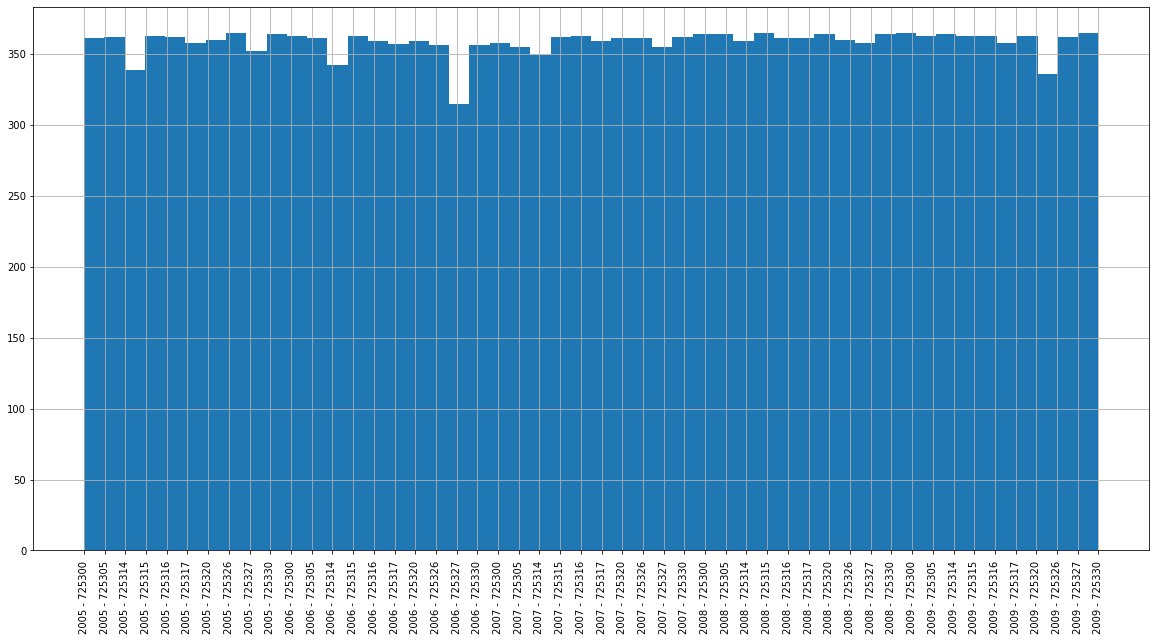

In [14]:
#Let's visualize the distribution of the years
check_dist = df.groupby(by = ["observed_date","station_number"]).apply(lambda x: 
                                                          f"{min(x['observed_date']).year} - {x['station_number'].min()} ")
check_dist.hist(bins = len(check_dist.unique()),figsize = (20,10), xrot =90);

We see that every station has approximately the same number of points

### Remark
We have only three columns left with nans. To find what we should do with them, we need to proceed some analysis. The columns are: "mean_sealevel_pressure", "num_mean_sealevel_pressure_samples", "max_gust_wind_speed" .

For this we will plot histogram of the not nan values and check how different the means depending on the "station_number"

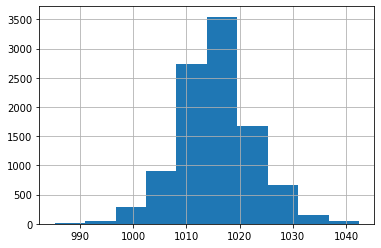

In [15]:
df["mean_sealevel_pressure"].loc[~df.isna().any(axis=1)].hist();

In [16]:
df.loc[~df.isna().any(axis=1)].groupby(by = "station_number")["mean_sealevel_pressure"].mean()

station_number
725300    1015.524541
725305    1014.927239
725314    1015.619844
725315    1015.521911
725316    1015.878863
725317    1015.776676
725320    1015.614186
725327    1015.644777
725330    1015.561169
Name: mean_sealevel_pressure, dtype: float64

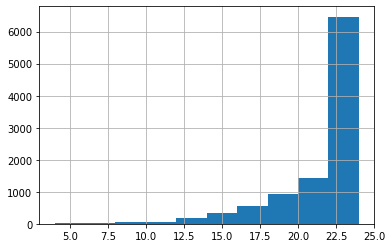

In [18]:
df["num_mean_sealevel_pressure_samples"].loc[~df.isna().any(axis=1)].hist();

In [19]:
df.loc[~df.isna().any(axis=1)].groupby(by = "station_number")["num_mean_sealevel_pressure_samples"].mean()

station_number
725300    22.678913
725305    21.180073
725314    21.682274
725315    21.145176
725316    21.468917
725317    20.910357
725320    21.957354
725327    20.413521
725330    22.075743
Name: num_mean_sealevel_pressure_samples, dtype: float64

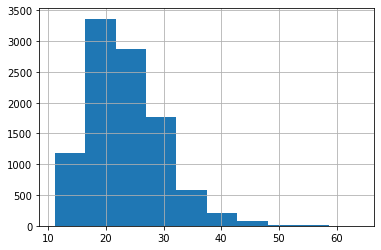

In [20]:
df["max_gust_wind_speed"].loc[~df.isna().any(axis=1)].hist();

In [21]:
df.loc[~df.isna().any(axis=1)].groupby(by = "station_number")["max_gust_wind_speed"].mean()

station_number
725300    22.867230
725305    23.368099
725314    21.948606
725315    24.757710
725316    24.223268
725317    23.457267
725320    22.322802
725327    22.886479
725330    23.952924
Name: max_gust_wind_speed, dtype: float64

The difference between means is not significant. We see that the distribution of the values for columns "max_gust_wind_speed" and "num_mean_sealevel_pressure_samples" are scewed. Consequently, we should choose to replace nans with mmedian values. 
Values of the column "mean_sealevel_pressure" are more equally distributed. Thus, mean value is one of the best choices.

In [22]:
mean_val = df["mean_sealevel_pressure"].mean()
df["mean_sealevel_pressure"].fillna(mean_val, inplace=True)

median_val = df["num_mean_sealevel_pressure_samples"].median()
df["num_mean_sealevel_pressure_samples"].fillna(median_val, inplace=True)

median_val = df["max_gust_wind_speed"].median()
df["max_gust_wind_speed"].fillna(median_val, inplace=True)

### Let's have a look at the DataFrame after preprocessing

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17924 entries, 60 to 377762
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   observed_date                       17924 non-null  object 
 1   station_number                      17924 non-null  int64  
 2   mean_temp                           17924 non-null  float64
 3   num_mean_temp_samples               17924 non-null  int64  
 4   mean_dew_point                      17924 non-null  float64
 5   num_mean_dew_point_samples          17924 non-null  float64
 6   mean_sealevel_pressure              17924 non-null  float64
 7   num_mean_sealevel_pressure_samples  17924 non-null  float64
 8   mean_visibility                     17924 non-null  float64
 9   num_mean_visibility_samples         17924 non-null  float64
 10  mean_wind_speed                     17924 non-null  float64
 11  num_mean_wind_speed_samples         179

Since we got rid of nans, we could change the format of those columns which are still "objects"

In [24]:
#check if there isno mistake
df["max_temperature_explicit"].unique()

array([False, True], dtype=object)

In [25]:
df["max_temperature_explicit"] = df["max_temperature_explicit"].astype(bool)

In [26]:
df["observed_date"] = df["observed_date"].astype('datetime64[D]')

In [27]:
#we do not have objects anymore
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17924 entries, 60 to 377762
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   observed_date                       17924 non-null  datetime64[ns]
 1   station_number                      17924 non-null  int64         
 2   mean_temp                           17924 non-null  float64       
 3   num_mean_temp_samples               17924 non-null  int64         
 4   mean_dew_point                      17924 non-null  float64       
 5   num_mean_dew_point_samples          17924 non-null  float64       
 6   mean_sealevel_pressure              17924 non-null  float64       
 7   num_mean_sealevel_pressure_samples  17924 non-null  float64       
 8   mean_visibility                     17924 non-null  float64       
 9   num_mean_visibility_samples         17924 non-null  float64       
 10  mean_wind_speed     

In [28]:
corr_df = df.drop(["observed_date"], axis = 1).corr()
corr_df

,station_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,...,max_temperature,max_temperature_explicit,total_precipitation,fog,rain,snow,hail,thunder,tornado,approved timerange
station_number,1.000000,-0.016291,-0.035910,0.000254,-0.033034,0.032332,-0.010590,-0.010873,-0.037577,-0.080478,...,-0.019380,0.029943,-0.019505,0.011234,0.011234,0.011234,0.011234,0.011234,0.011234,NaN
mean_temp,-0.016291,1.000000,-0.006746,0.965052,-0.005059,-0.345626,0.114308,0.113425,-0.007371,-0.300619,...,0.975254,-0.076854,0.078553,-0.092112,-0.092112,-0.092112,-0.092112,-0.092112,-0.092112,NaN
num_mean_temp_samples,-0.035910,-0.006746,1.000000,0.005631,0.974355,-0.021706,0.322041,-0.027116,0.993134,-0.005736,...,-0.024292,-0.098322,0.034663,0.037009,0.037009,0.037009,0.037009,0.037009,0.037009,NaN
mean_dew_point,0.000254,0.965052,0.005631,1.000000,0.004793,-0.397490,-0.011751,-0.050519,0.004657,-0.289760,...,0.970865,-0.061403,0.156153,-0.016970,-0.016970,-0.016970,-0.016970,-0.016970,-0.016970,NaN
num_mean_dew_point_samples,-0.033034,-0.005059,0.974355,0.004793,1.000000,-0.012089,0.323541,-0.021850,0.969692,-0.014157,...,-0.022693,-0.097408,0.025142,0.033976,0.033976,0.033976,0.033976,0.033976,0.033976,NaN
mean_sealevel_pressure,0.032332,-0.345626,-0.021706,-0.397490,-0.012089,1.000000,0.205893,0.166402,-0.021408,-0.251963,...,-0.376592,0.005931,-0.222174,-0.059449,-0.059449,-0.059449,-0.059449,-0.059449,-0.059449,NaN
num_mean_sealevel_pressure_samples,-0.010590,0.114308,0.322041,-0.011751,0.323541,0.205893,1.000000,0.560192,0.320134,-0.171243,...,0.041314,-0.111805,-0.303445,-0.325351,-0.325351,-0.325351,-0.325351,-0.325351,-0.325351,NaN
mean_visibility,-0.010873,0.113425,-0.027116,-0.050519,-0.021850,0.166402,0.560192,1.000000,-0.027867,-0.008293,...,0.051746,-0.058308,-0.218761,-0.460573,-0.460573,-0.460573,-0.460573,-0.460573,-0.460573,NaN
num_mean_visibility_samples,-0.037577,-0.007371,0.993134,0.004657,0.969692,-0.021408,0.320134,-0.027867,1.000000,-0.004715,...,-0.024744,-0.099098,0.033448,0.038359,0.038359,0.038359,0.038359,0.038359,0.038359,NaN
mean_wind_speed,-0.080478,-0.300619,-0.005736,-0.289760,-0.014157,-0.251963,-0.171243,-0.008293,-0.004715,1.000000,...,-0.253157,0.059564,0.154150,0.002883,0.002883,0.002883,0.002883,0.002883,0.002883,NaN


First let's check out where we have nan values in correlation

In [29]:
corr_df.isna().sum()

station_number                         1
mean_temp                              1
num_mean_temp_samples                  1
mean_dew_point                         1
num_mean_dew_point_samples             1
mean_sealevel_pressure                 1
num_mean_sealevel_pressure_samples     1
mean_visibility                        1
num_mean_visibility_samples            1
mean_wind_speed                        1
num_mean_wind_speed_samples            1
max_sustained_wind_speed               1
max_gust_wind_speed                    1
max_temperature                        1
max_temperature_explicit               1
total_precipitation                    1
fog                                    1
rain                                   1
snow                                   1
hail                                   1
thunder                                1
tornado                                1
approved timerange                    23
dtype: int64

We see that "approved timerange " has nan values with all columns. Let's see how many unique values "approved timerange" contains

In [30]:
df["approved timerange"].unique()

array([False])

We could drop this column since it has only one value

In [31]:
df = df.drop("approved timerange", axis=1)
corr_df = df.drop(["observed_date"], axis = 1).corr()

In [33]:
for i, column in enumerate(corr_df.columns):
    correlated_vals = corr_df[column].loc[(abs(corr_df[column])>0.5) & (corr_df[column].index != column)].index
    if len(correlated_vals)>0:
        print(f"{column} is correlated with \n {corr_df.loc[correlated_vals, column]} \n")

mean_temp is correlated with 
 mean_dew_point     0.965052
max_temperature    0.975254
Name: mean_temp, dtype: float64 

num_mean_temp_samples is correlated with 
 num_mean_dew_point_samples     0.974355
num_mean_visibility_samples    0.993134
num_mean_wind_speed_samples    0.942436
Name: num_mean_temp_samples, dtype: float64 

mean_dew_point is correlated with 
 mean_temp          0.965052
max_temperature    0.970865
Name: mean_dew_point, dtype: float64 

num_mean_dew_point_samples is correlated with 
 num_mean_temp_samples          0.974355
num_mean_visibility_samples    0.969692
num_mean_wind_speed_samples    0.920425
Name: num_mean_dew_point_samples, dtype: float64 

num_mean_sealevel_pressure_samples is correlated with 
 mean_visibility    0.560192
Name: num_mean_sealevel_pressure_samples, dtype: float64 

mean_visibility is correlated with 
 num_mean_sealevel_pressure_samples    0.560192
Name: mean_visibility, dtype: float64 

num_mean_visibility_samples is correlated with 
 num_

We see thw following correlation qwith snow:

snow is correlated with 

    fog        1.0
     
    rain       1.0
    
    hail       1.0
    
    thunder    1.0
    
    tornado    1.0
    
Since all these values are booleans, let's check if they are the same

In [34]:
corr_columns = ["fog", "rain", "hail", "thunder", "tornado"]
same = True
for column in corr_columns: 
    positive_vals = df.loc[df["snow"]][column].unique()
    if len(positive_vals) != 1 or not positive_vals[0]:
        print(column, " is not the same")
        same= False
    negative_vals = df.loc[~df["snow"]][column].unique()
    if len(negative_vals) != 1 or negative_vals[0]:
        print(column, " is not the same")
        same= False
if same:
    print("the columns are idenctical")

the columns are idenctical


Consequently, we could drop "fog", "rain", "hail", "thunder", "tornado" columns

In [35]:
df = df.drop( ["fog", "rain", "hail", "thunder", "tornado"], axis = 1)

Another correlation which we see is between "mean_temp", "mean_dew_point", "max_temperature"
We could drop "max_temperature" and keep "mean_temp". To be sure that the choise is correct, we could check out "max_temperature_explicit" to see how often maximmum temperature is explicit.
"mean_dew_point" is somethng what is important for snow, that is why we are going to keep it.

In [36]:
len(df[~df["max_temperature_explicit"]])

10485

We see that the majority of the time the max temmperature is not expllcit. It confirms our theory that we should drop max_termmperature. Also we could drop "max_temperature_explicit", since we do nto have information about max_temperature.

In [37]:
df = df.drop(["max_temperature", "max_temperature_explicit"], axis =1 )

Number of samples are quationaly ging to help us with the snow classification but what is more, majority of them are hightly correlated, consequently, we are going to drop them as well.

In [38]:
df = df.drop(["num_mean_temp_samples", "num_mean_dew_point_samples", 
  "num_mean_sealevel_pressure_samples", 
  "num_mean_visibility_samples","num_mean_wind_speed_samples"], axis = 1)

The last block of correlated values reffer to wind. If "mean_wind_speed" and "max_gust_wind_speed" are moderately correlated, "max_gust_wind_speed" is highly correlated. Consequently, we are going to drop "max_gust_wind_speed". 

In [39]:
df = df.drop("max_gust_wind_speed", axis = 1)

Let's have a look at our final dataset after preprocessing

In [40]:
df.reset_index(drop = True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17924 entries, 0 to 17923
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   observed_date             17924 non-null  datetime64[ns]
 1   station_number            17924 non-null  int64         
 2   mean_temp                 17924 non-null  float64       
 3   mean_dew_point            17924 non-null  float64       
 4   mean_sealevel_pressure    17924 non-null  float64       
 5   mean_visibility           17924 non-null  float64       
 6   mean_wind_speed           17924 non-null  float64       
 7   max_sustained_wind_speed  17924 non-null  float64       
 8   total_precipitation       17924 non-null  float64       
 9   snow                      17924 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(7), int64(1)
memory usage: 1.2 MB


### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [41]:
import datetime as dt

test_day = str(dt.datetime.today()- dt.timedelta(days=14*365)).split(' ')[0]
test_day

'2009-12-01'

To avoid data lickage we should check out if we have only one unique value for each station number and one day.

In [42]:
print( f"For each day and each station we have maximum maximum\
      {df.groupby(by = ['observed_date', 'station_number'])['mean_temp'].count().max()} value")

For each day and each station we have maximum maximum      1 value


The input of the model should be a previous day or a number of days and output is a boolean (snow or not snow). First we will try to predict i it snows using just a previous day information. Thus, time series classification problem can be seen as a normal cclassification problem. The first algotims, we will use are not going to be networks, consequently, train and test datasets are going to be sufficient. We will have 70/30 split. For more complex solutions, we will split get evaluation dataset 70/10/20.

We have 10 different stations, which are located in a different places. It means that we should make sure that train and test datasets have all stations equally presented. 

Let's also check out if our dataset balanced.

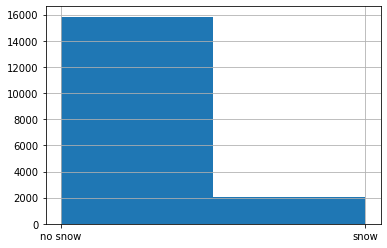

In [43]:
plot_snow = df[['snow']].copy()
plot_snow["plot"] = "no snow"
plot_snow.loc[plot_snow["snow"],["plot"]] = "snow"
plot_snow["plot"].hist(bins=2);

We see that we deal with disbalanced data, so we should also avoid the situation when train or test datasets do not have "snow" days

Since we might have days when a station does not contain information about the next day, we want to save the output of the model in the dataframe

In [44]:
output_df = df[["snow"]].copy()
output_df = output_df.rename(columns={"snow": "output"})
output_df["unique id"]=  df.apply(lambda x: 
                                  f"{str(x['observed_date'] + dt.timedelta(days=1))} - {str(x['station_number'])}", axis =1)
df["unique id"] = df.apply(lambda x: 
                           f"{str(x['observed_date'])} - {str(x['station_number'])}", axis =1)
merged_df = df.merge(output_df, how = "left", on="unique id")

Since we do not know how far away the stations are located, we want to have the same day presented in train and test datasets. We willl use the days first to split the dataset.

In [45]:
print(f"There {len(merged_df.loc[merged_df['output'].isna()])} values which do not have information about next day") 

There 252 values which do not have information about next day


Let's drop them

In [46]:
merged_df = merged_df.loc[~merged_df['output'].isna()].reset_index(drop=True)

Let's define, how we split the data.

First ensure that the day we want to use for prediction is in the test df. For this we need its index. The day is '2009-11-30' but we need a day before to make a prediction.

In [413]:
ix = merged_df.loc[
    merged_df["observed_date"] == dt.datetime.strptime(test_day, '%Y-%m-%d') - dt.timedelta(days=1)].index

In [856]:
import numpy as np

ix_test_df = np.random.randint(len(merged_df), size=(len(merged_df)*30//100))
ix_test_df = np.unique(np.append(ix_test_df,ix))
ix_train_df = list(set(range(len(merged_df))).difference(set(ix_test_df)))
train_df = merged_df.iloc[ix_train_df]
test_df = merged_df.iloc[ix_test_df]

Let's check out if all stations are presented:

In [857]:
print(f" train set {train_df.groupby('station_number')['snow'].count()}")
print(f" test set {test_df.groupby('station_number')['snow'].count()}")

 train set station_number
725300    1325
725305    1306
725314    1220
725315    1345
725316    1318
725317    1314
725320    1311
725326    1328
725327    1275
725330    1352
Name: snow, dtype: int64
 test set station_number
725300    470
725305    479
725314    482
725315    461
725316    472
725317    449
725320    476
725326    431
725327    415
725330    443
Name: snow, dtype: int64


We see that all stations are presented for both datasets. Let's check out for snowy and not snowy days

In [858]:
print(f" train set contains {len(train_df[train_df['snow']])*100/len(train_df)} of snowy days")
print(f" test set contains {len(test_df[test_df['snow']])*100/len(test_df)} of snowy days")

 train set contains 11.386894760959217 of snowy days
 test set contains 12.123197903014416 of snowy days


In [859]:
small_ix_test_df = np.random.randint(len(ix_test_df), size=(len(merged_df)*20//100)) 
small_ix_test_df = ix_test_df[list(small_ix_test_df)]
small_ix_test_df = np.unique(np.append(small_ix_test_df,ix))
ix_eval = list(set(ix_test_df).difference(set(small_ix_test_df)))
eval_df = merged_df.iloc[list(ix_eval)]
small_test_df = merged_df.iloc[small_ix_test_df]

In [860]:
print(f" train set {train_df.groupby('station_number')['snow'].count()}")
print(f" test set {small_test_df.groupby('station_number')['snow'].count()}")
print(f" avaluation set {eval_df.groupby('station_number')['snow'].count()}")

 train set station_number
725300    1325
725305    1306
725314    1220
725315    1345
725316    1318
725317    1314
725320    1311
725326    1328
725327    1275
725330    1352
Name: snow, dtype: int64
 test set station_number
725300    247
725305    262
725314    262
725315    240
725316    255
725317    217
725320    254
725326    237
725327    213
725330    259
Name: snow, dtype: int64
 avaluation set station_number
725300    223
725305    217
725314    220
725315    221
725316    217
725317    232
725320    222
725326    194
725327    202
725330    184
Name: snow, dtype: int64


In [861]:
print(f" train set contains {len(train_df[train_df['snow']])*100/len(train_df)} of snowy days")
print(f" test set contains {len(small_test_df[small_test_df['snow']])*100/len(small_test_df)} of snowy days")
print(f" avaluation set contains {len(eval_df[eval_df['snow']])*100/len(eval_df)} of snowy days")

 train set contains 11.386894760959217 of snowy days
 test set contains 12.551103843008994 of snowy days
 avaluation set contains 11.632270168855534 of snowy days


We would like to get random indexes for eac of the station

## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [1004]:
import datetime as dt
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


str(dt.datetime.today()- dt.timedelta(days=14*365)).split(' ')[0]

'2009-12-01'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [863]:
def datetime_to_float(d):
    epoch = dt.datetime.utcfromtimestamp(0)
    total_seconds =  (d - epoch).total_seconds()
    # total_seconds will be in decimals (millisecond precision)
    return total_seconds

Let's finish the preprocessing of the data

In [864]:
X, y = train_df.drop(["output", "unique id","station_number"], axis =1), train_df["output"].astype(bool)
X["observed_date"] = X["observed_date"].apply(lambda x: datetime_to_float(x))
X["snow"] = X["snow"].apply(lambda x: float(x))
X.reset_index(drop=True, inplace =True)
y.reset_index(drop=True, inplace =True)

In [865]:
test_X, test_y = test_df.drop(["output", 
                             "unique id", "station_number"], axis =1), test_df["output"].astype(bool)
test_X["observed_date"]= test_X["observed_date"].apply(lambda x: datetime_to_float(x))
test_X["snow"] = test_X["snow"].apply(lambda x: float(x))
test_X.reset_index(drop=True, inplace =True)
test_y.reset_index(drop=True, inplace =True)

First what we want to do it to use dmentionality reductionalgorithm to have a bettwe intuition about the splittability pof our data.

In [866]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
test_X_scaled = scaler.transform(test_X)

In [867]:
X_embedded = TSNE(n_components=2).fit_transform(X_scaled)

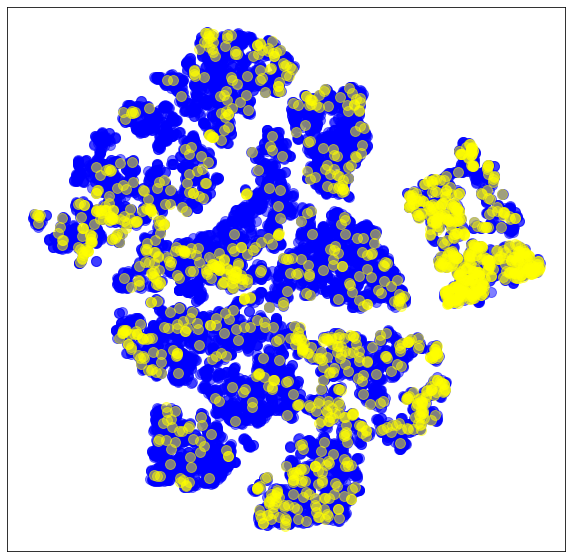

In [868]:
plt.figure(figsize=(10, 10)) 
plt.scatter(X_embedded[y[~y].index][:,0], X_embedded[y[~y].index][:,1], color = "blue", alpha = 0.5, s=100)
plt.scatter(X_embedded[y[y].index][:,0], X_embedded[y[y].index][:,1], color = "yellow", alpha = 0.5, s=100)
plt.xticks([])  
plt.yticks([]);

## KNN

In [869]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

In [870]:
train_predict = clf.predict(X_scaled)

In [876]:
roc_auc_score(y, train_predict)

0.7171023281347226

In [877]:
test_X_scaled = scaler.transform(test_X)
y_predicted = clf.predict(test_X_scaled)
roc_auc_score(test_y, y_predicted)

0.5902600762875816

In [879]:
accuracy_score(test_y, y_predicted)

0.8717780690257755

We see that one of the problems is imbalance of the data. Let's see if we could make the train data more balanced. "0" means that there was no snow, while "1" means that there was snow.

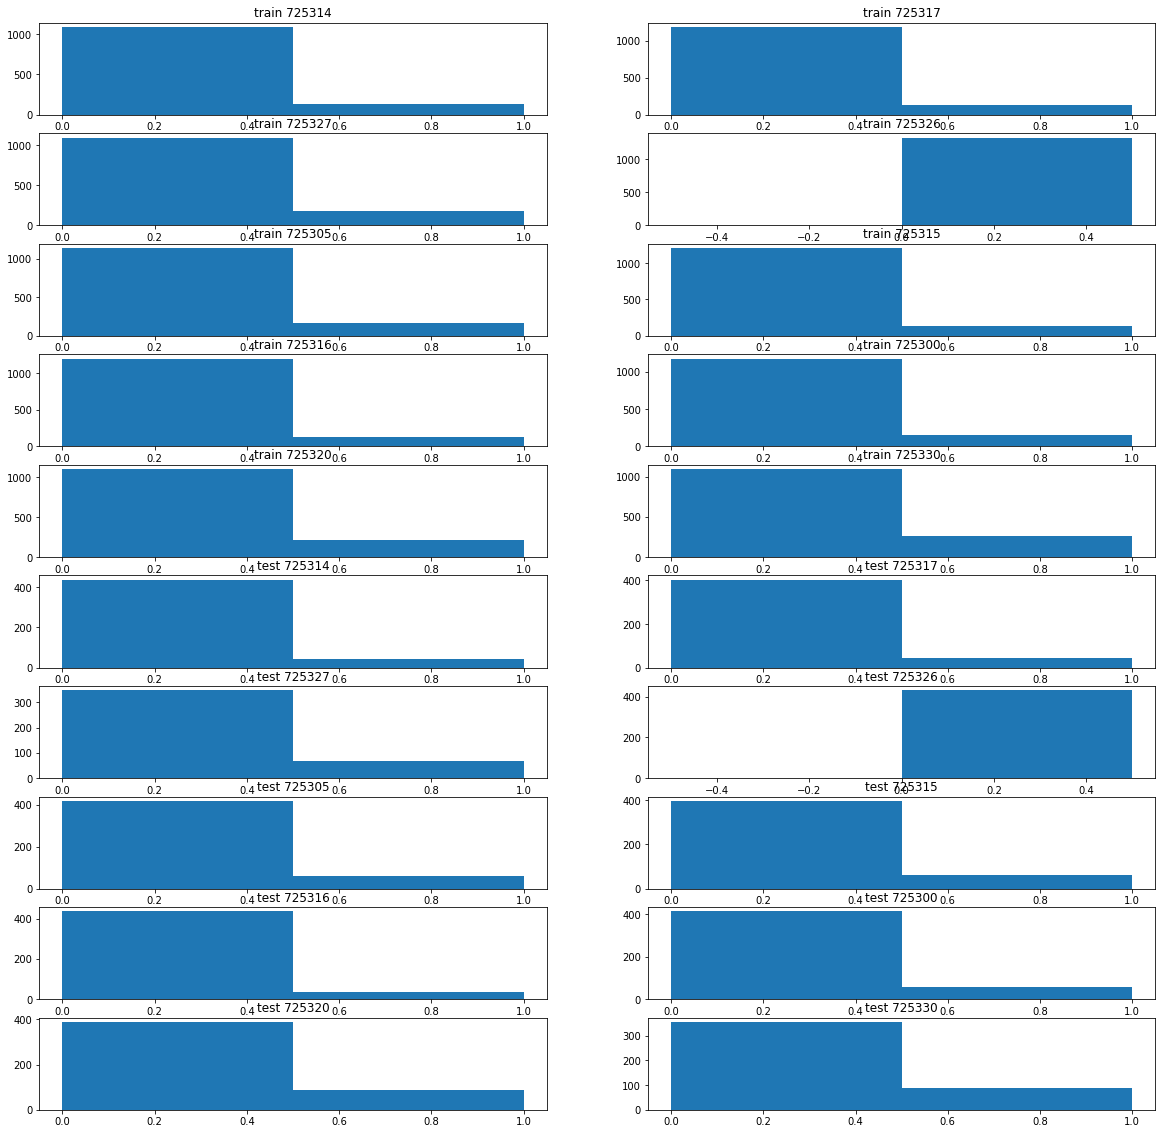

In [903]:
fig, axs = plt.subplots(nrows=len(df["station_number"].unique()), ncols=2, layout=None, figsize=(20,20))
plot_snow = train_df[['snow','station_number']].copy()
plot_snow["plot"] = 0
plot_snow.loc[plot_snow["snow"],["plot"]] = 1

for ax, station in zip(axs.flat[:len(axs)], df["station_number"].unique()):
    ax.hist(plot_snow.loc[(plot_snow["station_number"] == station), "plot"], bins=2)
    ax.set_title(f"train {station}")
    
plot_snow = test_df[['snow','station_number']].copy()
plot_snow["plot"] = 0
plot_snow.loc[plot_snow["snow"],["plot"]] = 1

for ax, station in zip(axs.flat[len(axs):], df["station_number"].unique()):
    ax.hist(plot_snow.loc[(plot_snow["station_number"] == station), "plot"], bins=2)
    ax.set_title(f"test {station}")

725326 does nothave any snow days

In [904]:
bal_train_df = train_df[train_df["station_number"]!=725326]

In [906]:
print(f" train set contains {len(bal_train_df[bal_train_df['snow']])*100/len(bal_train_df)} of snowy days")
print(f" test set contains {len(test_df[test_df['snow']])*100/len(test_df)} of snowy days")

 train set contains 12.672106068332484 of snowy days
 test set contains 12.123197903014416 of snowy days


In [907]:
#the percentage of snow days per each station number
for station in bal_train_df["station_number"].unique():
    part = bal_train_df.loc[bal_train_df["station_number"] == station]
    print(f"station {station}: train set contains {len(part[(part['snow'])])*100/len(part)} of snowy days")
    part = test_df.loc[test_df["station_number"] == station]
    print(f"station {station}: test set contains {len(part[part['snow']])*100/len(part)} of snowy days \n")

station 725314: train set contains 10.655737704918034 of snowy days
station 725314: test set contains 9.336099585062241 of snowy days 

station 725317: train set contains 9.74124809741248 of snowy days
station 725317: test set contains 10.244988864142538 of snowy days 

station 725315: train set contains 10.557620817843866 of snowy days
station 725315: test set contains 13.882863340563992 of snowy days 

station 725316: train set contains 9.408194233687405 of snowy days
station 725316: test set contains 7.838983050847458 of snowy days 

station 725327: train set contains 13.803921568627452 of snowy days
station 725327: test set contains 16.3855421686747 of snowy days 

station 725320: train set contains 16.399694889397406 of snowy days
station 725320: test set contains 18.48739495798319 of snowy days 

station 725305: train set contains 12.710566615620214 of snowy days
station 725305: test set contains 12.734864300626304 of snowy days 

station 725300: train set contains 11.39622641509

In [908]:
#clean the dataset from some not snowy days
not_snow_df = bal_train_df[~bal_train_df["snow"]]
not_snow_ix = np.random.randint(len(not_snow_df), size=(len(not_snow_df)*50//100))
bal_train_df = pd.concat([bal_train_df[bal_train_df["snow"]] ,
                      bal_train_df[~bal_train_df["snow"]].reset_index(drop=True).drop(not_snow_ix)])

In [909]:
for station in bal_train_df["station_number"].unique():
    part = bal_train_df.loc[bal_train_df["station_number"] == station]
    print(f"station {station}: train set contains {len(part[(part['snow'])])*100/len(part)} of snowy days")
    part = test_df.loc[test_df["station_number"] == station]
    print(f"station {station}: test set contains {len(part[part['snow']])*100/len(part)} of snowy days \n")

station 725317: train set contains 15.421686746987952 of snowy days
station 725317: test set contains 10.244988864142538 of snowy days 

station 725314: train set contains 16.189290161892902 of snowy days
station 725314: test set contains 9.336099585062241 of snowy days 

station 725320: train set contains 24.37641723356009 of snowy days
station 725320: test set contains 18.48739495798319 of snowy days 

station 725330: train set contains 27.759914255091104 of snowy days
station 725330: test set contains 19.864559819413092 of snowy days 

station 725327: train set contains 20.927467300832344 of snowy days
station 725327: test set contains 16.3855421686747 of snowy days 

station 725315: train set contains 16.099773242630384 of snowy days
station 725315: test set contains 13.882863340563992 of snowy days 

station 725305: train set contains 19.212962962962962 of snowy days
station 725305: test set contains 12.734864300626304 of snowy days 

station 725316: train set contains 14.55399061

In [910]:
f"New train dataset has {len(bal_train_df)} samples"

'New train dataset has 7736 samples'

In [911]:
bal_X, bar_y = bal_train_df.drop(["output", "unique id","station_number"], axis =1), bal_train_df["output"].astype(bool)
bal_X["observed_date"] = bal_X["observed_date"].apply(lambda x: datetime_to_float(x))
bal_X["snow"] = bal_X["snow"].apply(lambda x: float(x))
bal_X.reset_index(drop=True, inplace =True)
bal_X.reset_index(drop=True, inplace =True)
scaler = MinMaxScaler()
bal_X_scaled = scaler.fit_transform(bal_X)

In [912]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(bal_X_scaled, bar_y)

KNeighborsClassifier(n_neighbors=3)

In [913]:
train_predict = clf.predict(bal_X_scaled)
roc_auc_score(bar_y, train_predict)

0.7351637297532562

In [1007]:
test_X_scaled = scaler.transform(test_X)
y_predicted = clf.predict(test_X_scaled)
roc_auc_score(test_y, y_predicted)

0.5818203511569308

In [915]:
accuracy_score(test_y, y_predicted)

0.8606378331148974

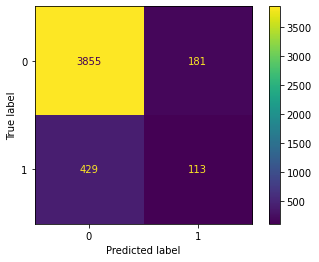

In [1008]:
cm = confusion_matrix(test_y, y_predicted) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

### Summary on KNN
The KNN model tend to define days to have snow even if there was none.Half of the days which were predicted to snow, did not have snow.

In [1009]:
last_test = small_test_df.loc[small_test_df["observed_date"] == '2009-11-30']
last_X, last_y = last_test.drop(["output", "unique id","station_number"], axis =1), \
                 last_test["output"].astype(bool)
last_X["observed_date"] = last_X["observed_date"].apply(lambda x: datetime_to_float(x))
last_X["snow"] = last_X["snow"].apply(lambda x: float(x))
last_X_scaled = scaler.transform(last_X)
y_predicted = model.predict(last_X_scaled)
last_y.reset_index(drop=True, inplace=True)
for i, pred in enumerate(y_predicted):
    print(f"It {'snowed' if last_y.iloc[i] else 'did not snow'}. It is predicted {'to snow' if pred else 'not to snow'}")

It did not snow. It is predicted not to snow
It did not snow. It is predicted not to snow
It did not snow. It is predicted not to snow
It snowed. It is predicted not to snow
It did not snow. It is predicted not to snow
It did not snow. It is predicted not to snow
It did not snow. It is predicted not to snow
It did not snow. It is predicted not to snow
It did not snow. It is predicted not to snow


## XGBOOST

Since KNN did not perform well, we will try tp gain a better result with a tree algorithm: XGBOOST. First, we should prepare threee sets: train, test and evaluation.

In [917]:
#scaling and preprocessing
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

eval_X, eval_y = eval_df.drop(["output", "unique id","station_number"], axis =1), \
                 eval_df["output"].astype(bool)
eval_X["observed_date"] = eval_X["observed_date"].apply(lambda x: datetime_to_float(x))
eval_X["snow"] = eval_X["snow"].apply(lambda x: float(x))
eval_X_scaled = scaler.transform(eval_X)


In [918]:
small_X_test, small_y_test = small_test_df.drop(["output", "unique id","station_number"], axis =1), \
                 small_test_df["output"].astype(bool)
small_X_test["observed_date"] = small_X_test["observed_date"].apply(lambda x: datetime_to_float(x))
small_X_test["snow"] = small_X_test["snow"].apply(lambda x: float(x))
small_X_test_scaled = scaler.transform(small_X_test)

There is a way to weigh the positive values more. It is a handy feature for imbalanced dataset. We want to try out different weights to get the best results.

In [948]:
pos_weights = [1, 5, 10, 15, 20, 25, 30, 35]

In [963]:
train_res = []
eval_res = []
for weight in pos_weights:
    model = xgb.XGBClassifier(scale_pos_weight = weight, random_state = 0)
    #we will use early stoping based on AUC metric to avoid overfitting which we saw with KNN
    model = model.set_params(callbacks = [xgb.callback.EarlyStopping(rounds=5,save_best=True)],
                             eval_metric= "auc")
    model.fit(X_scaled, y, eval_set=[(X_scaled, y), (eval_X_scaled, eval_y)], verbose = False)
    y_predicted = model.predict(eval_X_scaled)
    eval_res.append(roc_auc_score(eval_y, y_predicted))
    y_predicted = model.predict(X_scaled)
    train_res.append(roc_auc_score(y, y_predicted))

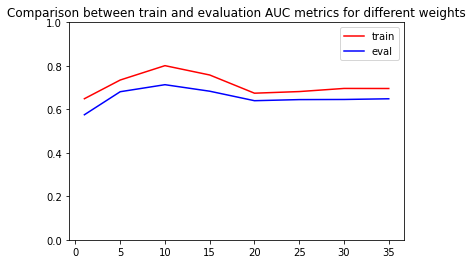

In [1011]:
plt.plot(pos_weights,train_res, color = "red", label = "train")
plt.plot(pos_weights,eval_res, color = "blue", label = "eval")
plt.legend()
plt.title("Comparison between train and evaluation AUC metrics for different weights")
plt.ylim(0,1);

In [1014]:
#We see that the tree is also overfitting
#We see the the scaling number 10 delivers the best results on evaluation and train dataset
#Since all models overfit, we choose "10" as a hyperparamter
model = xgb.XGBClassifier(scale_pos_weight = 10, random_state = 0)
model = model.set_params(callbacks = [xgb.callback.EarlyStopping(rounds=5,save_best=True)],
                         eval_metric= "auc")
model.fit(X_scaled, y, eval_set=[(X_scaled, y), (eval_X_scaled, eval_y)], verbose = False)

y_predicted = model.predict(X_scaled)
print("Final training accuracy " ,roc_auc_score(y, y_predicted))

y_predicted = model.predict(eval_X_scaled)
print("Final evaluation accuracy " ,roc_auc_score(eval_y, y_predicted))

y_predicted = model.predict(small_X_test_scaled)
print("Final test accuracy " ,roc_auc_score(small_y_test, y_predicted))

Final training accuracy  0.8008806673510233
Final evaluation accuracy  0.7133363521253134
Final test accuracy  0.7299679487179487


Let's get more insights about the model and have a look on confusion mmatrix

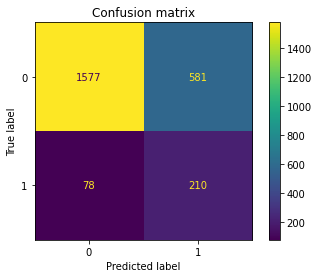

In [1016]:
cm = confusion_matrix(small_y_test, y_predicted) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.title("Confusion matrix")
plt.show()

We see that the model is still heavily affected by imbalance: more then a half of "snowy" days are not predicted correctly. The model tend to do less false negative results.

Let's see how our model works and if it snowed on 2009-12-01. We need to find '2009-11-30'.

In [998]:
last_test = small_test_df.loc[small_test_df["observed_date"] == '2009-11-30']
last_X, last_y = last_test.drop(["output", "unique id","station_number"], axis =1), \
                 last_test["output"].astype(bool)
last_X["observed_date"] = last_X["observed_date"].apply(lambda x: datetime_to_float(x))
last_X["snow"] = last_X["snow"].apply(lambda x: float(x))
last_X_scaled = scaler.transform(last_X)
y_predicted = model.predict(last_X_scaled)
last_y.reset_index(drop=True, inplace=True)
for i, pred in enumerate(y_predicted):
    print(f"It {'snowed' if last_y.iloc[i] else 'did not snow'}. It is predicted {'to snow' if pred else 'not to snow'}")

It did not snow. It is predicted not to snow
It did not snow. It is predicted not to snow
It did not snow. It is predicted not to snow
It snowed. It is predicted not to snow
It did not snow. It is predicted not to snow
It did not snow. It is predicted not to snow
It did not snow. It is predicted not to snow
It did not snow. It is predicted not to snow
It did not snow. It is predicted not to snow


### Summary

Since the goal of the model is to predict if the next day is snowy, we can see that both mmodels struggle with it. XGBoost tree tends to label mmore days as snowy, while KNN does not snowy days as those which have snow.